In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('loan_2015_ready.csv')
df.shape

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(283165, 119)

In [64]:
select_feature = ['totalilhighcreditlimit', 'allutil', 'numtl120dpd2m', 'mthssincerecentbc', 'inqlast12m', 'mortacc', 'numtl30dpd', 'openacc6m', 'pubrecbankruptcies', 'mthssincerecentinq', 'numrevaccts', 'numactvrevtl', 'dti', 'mthssincelastdelinq', 'mthssincelastmajorderog', 'openacc', 'delinqamnt', 'mthssincerecentbcdlq', 'pcttlnvrdlq', 'accopenpast24mths', 'annualincjoint', 'loanamnt', 'mosinrcnttl', 'openrv12m', 'accnowdelinq', 'totalbalil', 'mthssincercntil', 'collections12mthsexmed', 'avgcurbal', 'delinq2yrs', 'dtijoint', 'numoprevtl', 'annualinc', 'numrevtlbalgt0', 'mosinoldilacct', 'openil12m', 'mosinrcntrevtlop', 'taxliens', 'totalrevhilim', 'openactil', 'numacctsever120pd', 'percentbcgt75', 'totalbclimit', 'maxbalbc', 'openrv24m', 'totalacc', 'mthssincelastrecord', 'ficorangehigh', 'numtl90gdpd24m', 'numsats', 'revolbal', 'ficorangelow', 'totcollamt', 'totalbalexmort', 'chargeoffwithin12mths', 'totalcutl', 'inqfi', 'mosinoldrevtlop', 'numtloppast12m', 'bcutil', 'numiltl', 'installment', 'inqlast6mths', 'pubrec', 'tothicredlim', 'totcurbal', 'numbcsats', 'mthssincerecentrevoldelinq', 'ilutil', 'numactvbctl', 'openil24m', 'numbctl', 'bcopentobuy', 'earliestcrline_month', 'emplength', 'intrate', 'revolutil', 'grade', 'subgrade', 'zipcode', 'zipcode_freq', 'addrstate_freq', 'emptitle_freq', 'verificationstatusjoint_Not Verified', 'homeownership_ANY', 'homeownership_MORTGAGE', 'homeownership_OWN', 'homeownership_RENT', 'verificationstatus_Not Verified', 'verificationstatus_Source Verified', 'verificationstatus_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'initialliststatus_f', 'initialliststatus_w']
feat = select_feature
len(feat)

107

In [65]:
df_train = df.query("train_flg==1")
df_test = df.query("train_flg==0")
df_train.shape,df_test.shape

((252828, 119), (30337, 119))

In [66]:
x_train, y_train = df_train[feat], df_train.loanstatus
x_test, y_test = df_test[feat], df_test.loanstatus

In [5]:
x_train, y_train = df_train[feat], df_train.loanstatus
x_test, y_test = df_test[feat], df_test.loanstatus

cv_params = {'n_estimators':[205,220,235,250,265]}
other_params = {'learning_rate':0.02,'max_depth':6, 'min_child_weight':50,'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=10, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)
print("Scores:", optimized_GBM.grid_scores_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  5.0min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 15.2min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short wor

Best score: 0.705
Best parameters set: {'n_estimators': 265}


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [6]:
cv_params = {'n_estimators':[265, 300,400]}
other_params = {'learning_rate':0.02,'max_depth':6, 'min_child_weight':50,'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=10, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)


Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  7.1min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 22.0min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed: 25.6min remaining:  8.5min
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed: 35.5min finished


Best score: 0.708
Best parameters set: {'n_estimators': 400}


In [7]:
cv_params = {'n_estimators':[200,235,270,305, 340,400]}
other_params = {'learning_rate':0.05,'max_depth':6, 'min_child_weight':50,'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1,'objective':'binary:logistic'}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=10, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  5.2min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 16.8min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short wor

Best score: 0.710
Best parameters set: {'n_estimators': 400}


In [8]:
cv_params = {'n_estimators':[500,700,900,1100, 1300,1500]}
other_params = {'learning_rate':0.05,'max_depth':6, 'min_child_weight':50,'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1,'objective':'binary:logistic'}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=10, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed: 13.2min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 46.5min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 84.1min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 170.6min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_execu

Best score: 0.710
Best parameters set: {'n_estimators': 500}


In [9]:
cv_params = {'n_estimators':[425,450,475]}
other_params = {'learning_rate':0.05,'max_depth':6, 'min_child_weight':50,'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1,'objective':'binary:logistic', 'silent':0}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=10, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed: 10.0min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 30.4min
[Parallel(n_jobs=3)]: Done   9 out of  12 | elapsed: 31.7min remaining: 10.6min
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed: 44.4min finished


Best score: 0.710
Best parameters set: {'n_estimators': 425}


In [ ]:
print('done')

In [ ]:
x_train, y_train = df_train[feat], df_train.loanstatus
x_test, y_test = df_test[feat], df_test.loanstatus

cv_params = {
             'max_depth': [3,4,5,6,7,8,9,10],
             'min_child_weight':[30,50,100,150]
             }
other_params = {'learning_rate':0.02,'n_estimators':400, 'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1, 'objective':'binary:logistic', 'silent':0}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=5, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)
#Best score: 0.710
#Best parameters set: {'max_depth': 10, 'min_child_weight': 100}

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      |

In [6]:
cv_params = {
             'max_depth': [10],
             'min_child_weight':[75,125]
             }
other_params = {'learning_rate':0.02,'n_estimators':400, 'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1, 'objective':'binary:logistic', 'silent':0}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=5, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   8 | elapsed: 30.5min remaining: 18.3min
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed: 41.1min finished


Best score: 0.710
Best parameters set: {'max_depth': 10, 'min_child_weight': 75}


In [7]:
cv_params = {
             'max_depth': [15,20],
             'min_child_weight':[75]
             }
other_params = {'learning_rate':0.02,'n_estimators':400, 'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1, 'objective':'binary:logistic', 'silent':0}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=5, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   5 out of   8 | elapsed: 45.3min remaining: 27.2min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   8 out of   8 | elapsed: 63.5min finished


Best score: 0.710
Best parameters set: {'max_depth': 15, 'min_child_weight': 75}


In [8]:
cv_params = {
             'max_depth': [10],
             'min_child_weight':[75]
             }
other_params = {'learning_rate':0.05,'n_estimators':400, 'gamma':0.2,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1, 'objective':'binary:logistic', 'silent':0}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=5, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   4 | elapsed: 15.2min remaining: 15.2min
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed: 25.2min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   4 out of   4 | elapsed: 25.2min finished


Best score: 0.708
Best parameters set: {'max_depth': 10, 'min_child_weight': 75}


In [6]:
cv_params = {'max_depth': [4,6,8],
             'gamma':[0.2,0.4,0.8,0.9]}
other_params = {'learning_rate':0.05, 'min_child_weight':75,'n_estimators':400,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1,'objective':'binary:logistic'}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=10, n_jobs=3)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)
print("Scores:", optimized_GBM.grid_scores_)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed: 10.4min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 34.5min
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed: 58.1min
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed: 82.4min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 112.5min
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 155.3min
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or b

Best score: 0.711
Best parameters set: {'gamma': 0.8, 'max_depth': 6}


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [7]:
cv_params = {'learning_rate':[0.02, 0.04, 0.06, 0.08]}
other_params = {'n_estimators':400, 'max_depth':6, 'min_child_weight':75,'gamma':0.8,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1, 'objective':'binary:logistic'}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=1, n_jobs=1)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)


Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 105.6min finished


Best score: 0.710
Best parameters set: {'learning_rate': 0.04}


In [ ]:
cv_params = {'learning_rate':[0.02, 0.04, 0.06, 0.08]}
other_params = {'n_estimators':400, 'max_depth':6, 'min_child_weight':75,'gamma':0.8,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1, 'objective':'binary:logistic'}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='roc_auc', cv=4, verbose=1, n_jobs=1)
optimized_GBM.fit(x_train, y_train)
print("Best score: %0.3f" % optimized_GBM.best_score_)
print("Best parameters set:", optimized_GBM.best_params_)

In [8]:
optimal_params = {'n_estimators':400, 'learning_rate': 0.04, 'max_depth':6, 'min_child_weight':75,'gamma':0.8,'seed':1234,'subsample':0.78,'colsample_bytree':0.67,
                'nthread': -1, 'objective':'binary:logistic'}

### Predict 

In [67]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic',booster='gbtree',n_estimators=400, learning_rate= 0.04, 
                              max_depth=6, min_child_weight=75, gamma=0.8, seed=1234,
                              subsample=0.78, colsample_bytree=0.67)

In [68]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.67, gamma=0.8, learning_rate=0.04,
       max_delta_step=0, max_depth=6, min_child_weight=75, missing=None,
       n_estimators=400, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=1234, silent=True,
       subsample=0.78)

In [69]:
y_pred = model_xgb.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [70]:
y_pred_proba = model_xgb.predict_proba(x_test)
y_pred_proba[:5]

array([[0.8402078 , 0.15979216],
       [0.9026889 , 0.09731109],
       [0.8228448 , 0.17715518],
       [0.9291293 , 0.07087069],
       [0.8672515 , 0.13274845]], dtype=float32)

In [123]:
y_pred_proba[:5][:,1]

array([0.15979216, 0.09731109, 0.17715518, 0.07087069, 0.13274845],
      dtype=float32)

In [72]:
from sklearn.metrics import roc_curve, auc

In [73]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba[:,1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_test

0.7202610465498235

AUC--train: 0.750
AUC--test: 0.720


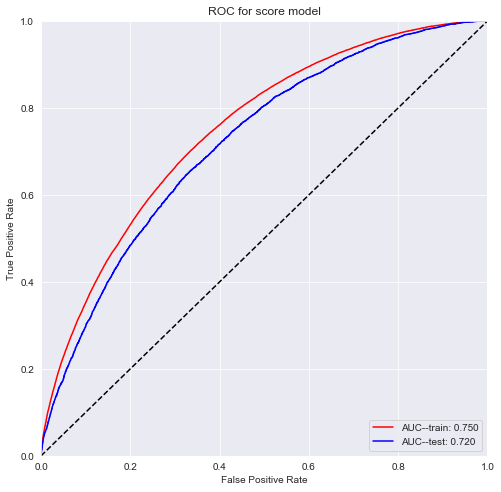

In [74]:
y_train_proba = model_xgb.predict_proba(x_train)
y_test_proba = model_xgb.predict_proba(x_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba[:,1])
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)
print('AUC--train: %.3f' %roc_auc_train)
print('AUC--test: %.3f' %roc_auc_test)
#plot ROC curve
plt.figure(figsize=(8,8))
plt.plot(fpr_train, tpr_train,label='AUC--train: %.3f' %roc_auc_train, color='r')
plt.plot(fpr_test, tpr_test,label='AUC--test: %.3f' %roc_auc_test, color='b')
plt.plot([0,1],[0,1],'k--')#k: black
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for score model')
plt.legend(loc='lower right')

### Save model 

In [124]:
import pickle

with open('model_xgb.pkl', 'wb') as outfile:
    pickle.dump(model_xgb, outfile)

### Save csv 

In [75]:
y_train_proba[:,1]

array([0.03954922, 0.19568066, 0.12063516, ..., 0.23304221, 0.19181605,
       0.16894276], dtype=float32)

In [76]:
loan_2015_train = df_train[['id','issued','intrate','grade','subgrade','loanstatus']]
loan_2015_train['defaultrate'] = y_train_proba[:,1]
loan_2015_test = df_test[['id','issued','intrate','grade','subgrade','loanstatus']]
loan_2015_test['defaultrate'] = y_test_proba[:,1]
loan_2015_test[:5]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,issued,intrate,grade,subgrade,loanstatus,defaultrate
0,68355089,Dec-2015,11.99,3,11,0,0.159792
1,68407277,Dec-2015,13.99,3,14,0,0.097311
2,68426831,Dec-2015,13.44,3,13,0,0.177155
3,68476668,Dec-2015,9.17,2,7,0,0.070871
4,68338832,Dec-2015,12.88,3,12,0,0.132748


In [77]:
loan_2015_train.shape, loan_2015_test.shape

((252828, 7), (30337, 7))

In [78]:
loan_2015_pred = pd.concat([loan_2015_train, loan_2015_test], axis=0)
loan_2015_pred.shape

(283165, 7)

In [88]:
loan_2015_pred.to_csv('loan_2015_pred.csv',index=False)

In [79]:
loan_2015_pred.defaultrate.max(),loan_2015_pred.defaultrate.min()

(0.7107938, 0.005655391)

In [91]:
len(loan_2015_pred.query('defaultrate>0.5'))

893

In [80]:
loan_2015_pred.intrate.max(),loan_2015_pred.intrate.min()

(28.99, 5.32)

In [89]:
loan_2015_pred.query('defaultrate<=0.08 and grade>3')

,id,issued,intrate,grade,subgrade,loanstatus,defaultrate
29158,65607855,Nov-2015,15.41,4,16,0,0.079372
29872,65677132,Nov-2015,15.41,4,16,0,0.064618
30394,65606977,Nov-2015,16.99,4,18,0,0.070190
45152,65037274,Nov-2015,16.99,4,18,0,0.066461
51477,64087878,Nov-2015,16.55,4,17,0,0.068431
59207,63507203,Oct-2015,17.86,4,20,0,0.071886
62762,63404863,Oct-2015,15.61,4,16,0,0.056698
63216,63394810,Oct-2015,15.61,4,16,0,0.077363
67143,62589633,Nov-2015,16.55,4,17,0,0.071489
68006,62126922,Oct-2015,15.61,4,16,0,0.072998


In [107]:
fscore = model_xgb.get_booster().get_fscore()
fscore.items()                

dict_items([('intrate', 478), ('grade', 54), ('numactvrevtl', 110), ('totalrevhilim', 333), ('accopenpast24mths', 433), ('homeownership_RENT', 114), ('numrevaccts', 144), ('numactvbctl', 114), ('avgcurbal', 391), ('emplength', 301), ('annualinc', 383), ('emptitle_freq', 494), ('mosinoldrevtlop', 365), ('mthssincerecentbc', 355), ('bcutil', 335), ('revolbal', 321), ('tothicredlim', 345), ('loanamnt', 333), ('installment', 458), ('subgrade', 141), ('numrevtlbalgt0', 150), ('mthssincelastrecord', 228), ('dti', 690), ('totcurbal', 265), ('bcopentobuy', 378), ('revolutil', 263), ('mthssincerecentinq', 299), ('addrstate_freq', 206), ('mortacc', 137), ('zipcode_freq', 294), ('ficorangelow', 101), ('mosinoldilacct', 347), ('numbcsats', 132), ('earliestcrline_month', 339), ('mthssincelastmajorderog', 174), ('zipcode', 504), ('verificationstatus_Not Verified', 20), ('numsats', 66), ('ficorangehigh', 230), ('numbctl', 197), ('numtloppast12m', 79), ('totalbclimit', 305), ('purpose_debt_consolidati

In [105]:
pd.Series(model_xgb.get_booster().get_fscore())

intrate                               478
grade                                  54
numactvrevtl                          110
totalrevhilim                         333
accopenpast24mths                     433
homeownership_RENT                    114
numrevaccts                           144
numactvbctl                           114
avgcurbal                             391
emplength                             301
annualinc                             383
emptitle_freq                         494
mosinoldrevtlop                       365
mthssincerecentbc                     355
bcutil                                335
revolbal                              321
tothicredlim                          345
loanamnt                              333
installment                           458
subgrade                              141
numrevtlbalgt0                        150
mthssincelastrecord                   228
dti                                   690
totcurbal                         

In [112]:
feature_importance = pd.Series(model_xgb.get_booster().get_fscore()).sort_values(ascending=False)
feature_importance[:15]

dti                     690
zipcode                 504
emptitle_freq           494
intrate                 478
installment             458
accopenpast24mths       433
avgcurbal               391
annualinc               383
bcopentobuy             378
mosinoldrevtlop         365
mthssincerecentbc       355
mosinoldilacct          347
tothicredlim            345
earliestcrline_month    339
bcutil                  335
dtype: int64

Text(0, 0.5, 'Features')

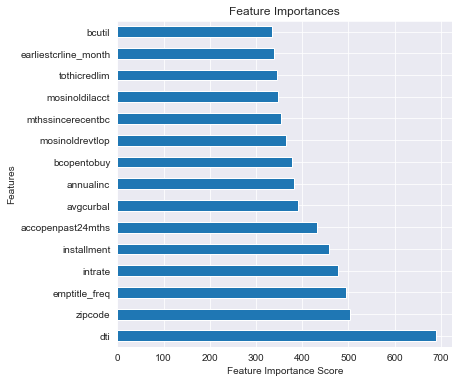

In [118]:
feature_importance[:15].plot(kind='barh',title='Feature Importances', figsize=(6, 6))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')